In [1]:
#%matplotlib ipympl
%matplotlib widget
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import Bounding_Method as bndm
import pyobs
# from scipy.stats import norm
import bison

# plt.rcParams.update({
#     "text.usetex"      : True,
#     "font.family"      : "Helvetica",
#     "mathtext.fontset" : "dejavuserif"
# })
plt.rcParams.update({
    "axes.axisbelow"   : True,
})

In [2]:
### Data file ###
data = bison.load("Cnfgs_measurement/WF-slices_beta617_seed123456.dat")

[Bison] : Reading file Cnfgs_measurement/WF-slices_beta617_seed123456.dat
[Bison] : File created by gmorandi at ampere on Tue Dec 19 00:02:04 2023
[Bison] : Read 278.455 MB at 535.372 MB/s


In [3]:
##############################
### General run parameters ###
##############################
beta      =  data['beta coupling']
L1, L2, L3, T = data['Lattice']
V         =  L1 * L2 * L3 * T
D         =  4
Ns        =  data['Number of steps of OMF4 integrator']
tauMD     =  data['Length of each MD trajectory']
Ntraj     =  data['MD trajectories']
MC_step   =  data['MC measure step']
eps_WF    =  data['epsilon WF']
WF_evol   =  data['WF evolutions from t = 0']
WF_step   =  data['WF measure step']
Nwf       =  WF_evol // WF_step + 1
Nc_run    = Ntraj // MC_step

Ncnfg0 = 0
for key in data:
    if key.startswith('Configuration'):
        Ncnfg0 += 1


print(f"\n Lattice                =  [{L1}x{L2}x{L3}x{T}]")
print(f" Lattice volume         =  {V}")
print(f" beta                   =  {beta}")
print(f" Steps of OMF4          =  {Ns}")
print(f" tau MD                 =  {tauMD}")
print(f" MD trajectories        =  {Ntraj}")
print(f" MC interval between measurements  =  {MC_step}")
print(f" epsilon of Wilson Flow =  {eps_WF}")
print(f" Wilson Flow evolutions =  {WF_evol}")
print(f" Wilson Flow steps between measurements =  {WF_step}\n")

Ntherm0 = 200
skip = (5 * 20 * MC_step - Ntherm0) // MC_step
Ncnfg = Ncnfg0 - skip
print(f"\n Total MC configs. = {Ncnfg} (after removing initial due to therm.)")


 Lattice                =  [32x32x32x64]
 Lattice volume         =  2097152
 beta                   =  6.17
 Steps of OMF4          =  8
 tau MD                 =  2.0
 MD trajectories        =  200
 MC interval between measurements  =  10
 epsilon of Wilson Flow =  0.02
 Wilson Flow evolutions =  300
 Wilson Flow steps between measurements =  5


 Total MC configs. = 3020 (after removing initial due to therm.)


In [4]:
########################################################
### Loading history run and observables measurements ###
WF_EClov   = np.zeros((Ncnfg0, Nwf, T)) 
WF_Q       = np.zeros((Ncnfg0, Nwf, T))

t_WF = np.array([eps_WF * WF_step * i for i in range(Nwf)])

for i in range(Ncnfg0):
    WF_EClov[i,:,:] = data[f'Configuration {i+1}']['E_Clov']
    WF_Q[i,:,:]     = data[f'Configuration {i+1}']['Q']
########################################################

In [5]:
def divisors(num):
    div = []
    for i in range(1, int(np.sqrt(num))+1):
        if num % i == 0:
            div.append(i)
            if i != num // i: 
                div.append(num // i) 
    return sorted(div)

print(f"Possible bin sizes = {divisors(Ncnfg)}")

Possible bin sizes = [1, 2, 4, 5, 10, 20, 151, 302, 604, 755, 1510, 3020]


In [6]:
################################################
### Computation of MF correlator <E(t)> Clov ###
bin_size_E = 20
Nbin_E     = Ncnfg // bin_size_E
bin_size_Q = 151
Nbin_Q     = Ncnfg // bin_size_Q

EClov = []
Q     = []
for i0 in range(Nwf):
    EClov.append(pyobs.observable(description=f'<E>_Clov MF for t_WF = {t_WF[i0]:.2f}'))
    EClov[-1].create('Ensemble A', [rep for rep in np.mean(WF_EClov[skip:,i0,:].reshape(Nbin_E, bin_size_E, T), axis=1)], lat=[T])
    EClov[-1] *= T/V
    Q.append(pyobs.observable(description=f'<Q> MF for t_WF = {t_WF[i0]:.2f}'))
    Q[-1].create('Ensemble A', [rep for rep in np.mean(WF_Q[skip:,i0,:].reshape(Nbin_Q, bin_size_Q, T), axis=1)], lat=[T])
    Q[-1] *= T/V
    print(f"t_WF = {t_WF[i0]:.2f}  :  <E>_Clov = {EClov[-1]}                     <Q> = {Q[-1]}")
################################################

t_WF = 0.00  :  <E>_Clov = 1.955312(11)
                     <Q> = -0.16(15)

t_WF = 0.10  :  <E>_Clov = 1.373087(16)
                     <Q> = -0.10(26)

t_WF = 0.20  :  <E>_Clov = 0.859927(17)
                     <Q> = -0.03(39)

t_WF = 0.30  :  <E>_Clov = 0.548207(17)
                     <Q> = -0.00(49)

t_WF = 0.40  :  <E>_Clov = 0.370996(16)
                     <Q> = 0.01(56)

t_WF = 0.50  :  <E>_Clov = 0.266800(16)
                     <Q> = 0.01(60)

t_WF = 0.60  :  <E>_Clov = 0.201885(15)
                     <Q> = 0.00(63)

t_WF = 0.70  :  <E>_Clov = 0.159061(15)
                     <Q> = 0.00(65)

t_WF = 0.80  :  <E>_Clov = 0.129371(15)
                     <Q> = 0.00(67)

t_WF = 0.90  :  <E>_Clov = 0.107915(14)
                     <Q> = -0.00(68)

t_WF = 1.00  :  <E>_Clov = 0.091870(14)
                     <Q> = -0.00(69)

t_WF = 1.10  :  <E>_Clov = 0.079527(14)
                     <Q> = -0.00(69)

t_WF = 1.20  :  <E>_Clov = 0.069803(14)
                     <Q> = -0

In [7]:
# dQ_t   = np.zeros((Nwf, Nbin_Q, T))
# dQdQ_t = np.zeros((Nwf, Nbin_Q, T, T)) 
# for i0 in range(Nwf):
#     for key in Q[i0].delta.keys():
#         dQ_t[i0,int(key.split(":")[-1]),:] = Q[i0].delta[key].delta.reshape(T)

# for tp in range(T):
#     dQdQ_t[:,:,:,tp] = dQ_t * np.roll(dQ_t, -tp, axis=2)

# QQ = []
# for i0 in range(Nwf):
#     QQ.append(pyobs.observable(description=f'<q(t)q(0)> MF for tWF = {t_WF[i0]:.2f}'))
#     QQ[-1].create('Ensemble A', [rep.flatten() for rep in dQdQ_t[i0,:,:,:]], shape=(T,), lat=[T])
#     # QQ[-1] /= V
#     # QQ[-1] -= pyobs.tile(Q[i0] * Q[i0], T) / T
#     print(f"t_WF = {t_WF[i0]:.2f}  :  <q(t)q(0)> = {QQ[-1]}")

In [8]:
###############################################################
### Computation of q(t)q(t+t') for MF correlator <q(t)q(0)> ###
qq_WF = np.zeros((Ncnfg0, Nwf, T, T))

for tp in range(T):
    qq_WF[:,:,:,tp] = WF_Q * np.roll(WF_Q, -tp, axis=2) * (T / V)
###############################################################
    
print(f"Possible bin sizes = {divisors(Ncnfg)}")

Possible bin sizes = [1, 2, 4, 5, 10, 20, 151, 302, 604, 755, 1510, 3020]


In [9]:
###############################################
### Computation of MF correlator <q(t)q(0)> ###
bin_size_Q2 = 151
Nbin_Q2     = Ncnfg // bin_size_Q2

QQ = []
for i0 in range(Nwf):
    QQ.append(pyobs.observable(description=f'<q(t)q(0)> MF for tWF = {t_WF[i0]:.2f}'))
    QQ[-1].create('Ensemble A', [rep.flatten() for rep in np.mean(qq_WF[skip:,i0,:,:].reshape(Nbin_Q2, bin_size_Q2, T, T), axis=1)], shape=(T,), lat=[T])
    QQ[-1] /= V
    QQ[-1] -= pyobs.tile(Q[i0] * Q[i0], T) / T
    print(f"t_WF = {t_WF[i0]:.2f}  :  <q(t)q(0)> = {QQ[-1]}")
###############################################

t_WF = 0.00  :  <q(t)q(0)> = 54.91(17)	-4.81(13)	-1.26(12)	0.04(13)	0.10(12)	-0.31(12)	0.10(12)	-0.04(13)	0.06(11)	-0.17(13)	-0.18(14)	-0.25(12)	-0.06(13)	0.07(13)	-0.00(12)	0.13(13)	0.04(14)	0.17(11)	-0.05(11)	0.06(14)	-0.13(12)	0.06(12)	-0.04(12)	0.01(13)	-0.17(13)	0.05(12)	-0.02(13)	-0.16(14)	0.11(12)	-0.02(13)	-0.07(13)	0.12(12)	0.26(13)	0.12(12)	-0.07(13)	-0.02(13)	0.11(12)	-0.16(14)	-0.02(13)	0.05(12)	-0.17(13)	0.01(13)	-0.04(12)	0.06(12)	-0.13(12)	0.06(14)	-0.05(11)	0.17(11)	0.04(14)	0.13(13)	-0.00(12)	0.07(13)	-0.06(13)	-0.25(12)	-0.18(14)	-0.17(13)	0.06(11)	-0.04(13)	0.10(12)	-0.31(12)	0.10(12)	0.04(13)	-1.26(12)	-4.81(13)

t_WF = 0.10  :  <q(t)q(0)> = 43.58(13)	-3.900(93)	-4.057(96)	-0.79(10)	-0.06(11)	-0.44(10)	-0.034(91)	0.102(100)	0.02(11)	-0.13(11)	0.01(11)	-0.14(11)	-0.02(10)	-0.12(11)	0.050(99)	0.02(11)	0.018(99)	0.14(10)	-0.173(95)	-0.018(95)	0.017(94)	0.02(11)	0.041(98)	0.03(10)	-0.01(10)	0.02(10)	-0.00(10)	-0.05(10)	0.08(11)	0.032(95)	-0.12(11)	0.10(10)	0.23(10)	0.10

Computation of Master-field correlator
$$
    \chi^{T_\mathrm{max}} = \frac{1}{V} \sum_{t = 0}^{T_\mathrm{max}-1} \langle \widetilde{q}(t) \widetilde{q}(0) \rangle_c \, , \quad \forall \;t_\mathrm{WF} \, .
$$

In [10]:
#########################################
### Computation of Chi^T for any t_WF ###
Tsym  = T // 2
Tstop = T-1
obs_Chi_T = []
for i0 in range(Nwf):
    #obs_Chi_T.append(2 * pyobs.cumsum(QQ[i0]) - pyobs.tile(QQ[i0][0], T) - pyobs.tile(QQ[i0][Tsym], T))
    obs_Chi_T.append(pyobs.cumsum(QQ[i0]))
    obs_Chi_T[-1] /= V
    print(f"t_WF = {t_WF[i0]:.2f}  :  Chi^{Tstop} = {obs_Chi_T[-1][Tstop] * V}")
#########################################

t_WF = 0.00  :  Chi^63 = 41.89(89)

t_WF = 0.10  :  Chi^63 = 25.05(72)

t_WF = 0.20  :  Chi^63 = 22.0(1.4)

t_WF = 0.30  :  Chi^63 = 25.2(2.0)

t_WF = 0.40  :  Chi^63 = 29.1(2.5)

t_WF = 0.50  :  Chi^63 = 32.3(2.9)

t_WF = 0.60  :  Chi^63 = 34.8(3.2)

t_WF = 0.70  :  Chi^63 = 36.6(3.4)

t_WF = 0.80  :  Chi^63 = 38.0(3.5)

t_WF = 0.90  :  Chi^63 = 39.1(3.6)

t_WF = 1.00  :  Chi^63 = 40.0(3.7)

t_WF = 1.10  :  Chi^63 = 40.7(3.8)

t_WF = 1.20  :  Chi^63 = 41.3(3.9)

t_WF = 1.30  :  Chi^63 = 41.9(3.9)

t_WF = 1.40  :  Chi^63 = 42.3(3.9)

t_WF = 1.50  :  Chi^63 = 42.7(4.0)

t_WF = 1.60  :  Chi^63 = 43.1(4.0)

t_WF = 1.70  :  Chi^63 = 43.4(4.0)

t_WF = 1.80  :  Chi^63 = 43.7(4.1)

t_WF = 1.90  :  Chi^63 = 43.9(4.1)

t_WF = 2.00  :  Chi^63 = 44.2(4.1)

t_WF = 2.10  :  Chi^63 = 44.4(4.1)

t_WF = 2.20  :  Chi^63 = 44.6(4.1)

t_WF = 2.30  :  Chi^63 = 44.7(4.1)

t_WF = 2.40  :  Chi^63 = 44.9(4.1)

t_WF = 2.50  :  Chi^63 = 45.1(4.2)

t_WF = 2.60  :  Chi^63 = 45.2(4.2)

t_WF = 2.70  :  Chi^63 = 45.

In [11]:
##############################################
### Autocorrelation functions for <E>, <Q> ### 
def gamma_MF(v):
    vtilde = np.fft.fft(v)
    vp  = np.fft.ifft(vtilde * np.conjugate(vtilde))
    return vp.real / T                  # <--- note the division by T

Tmax = T // 2 + 1

gammas_E = np.zeros((Nbin_E, Nwf, Tmax))
gammas_Q = np.zeros((Nbin_Q, Nwf, Tmax))
Gamma_E_tWF = []
Gamma_Q_tWF = []
for i0 in range(Nwf):
    for key in EClov[i0].delta.keys():
        gamma = gamma_MF(np.array(EClov[i0].delta[key].delta).reshape(T))
        gammas_E[int(key.split(':')[-1]), i0] = gamma[:Tmax]
    Gamma_E_tWF.append(pyobs.observable(description=f"Autocorr. fun. of <E>_Clov at t_WF = {t_WF[i0]:.2f}"))
    Gamma_E_tWF[-1].create('Ensemble A', np.array(gammas_E[:, i0]).flatten(), shape=(Tmax,))

    for key in Q[i0].delta.keys():
        gamma = gamma_MF(np.array(Q[i0].delta[key].delta).reshape(T))
        gammas_Q[int(key.split(':')[-1]), i0] = gamma[:Tmax]
    Gamma_Q_tWF.append(pyobs.observable(description=f"Autocorr. fun. of <Q> at t_WF = {t_WF[i0]:.2f}"))
    Gamma_Q_tWF[-1].create('Ensemble A', np.array(gammas_Q[:, i0]).flatten(), shape=(Tmax,))
##############################################

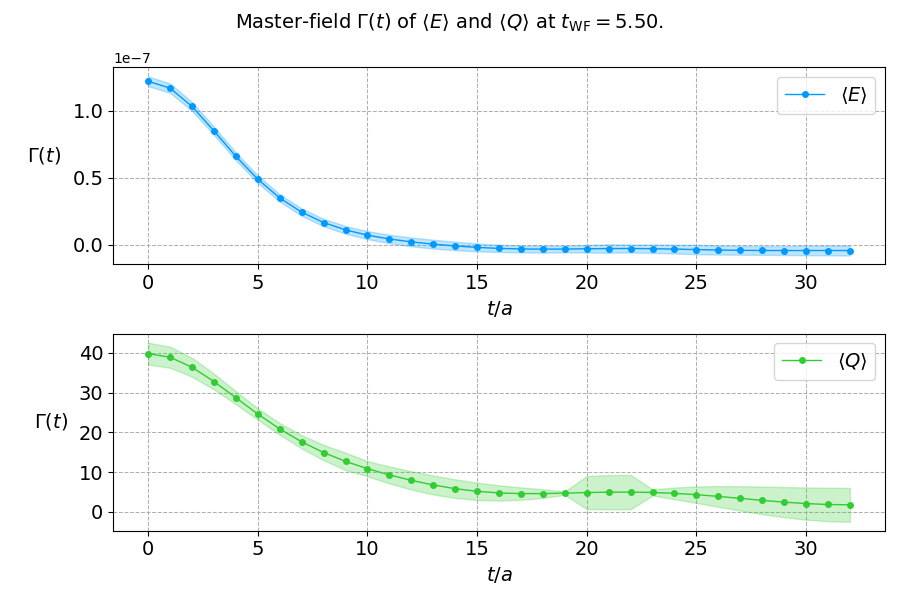

In [12]:
### Choose t_WF to plot ###
t0 = 5.50
i0 = int(np.around(t0 / (WF_step * eps_WF)))

gE, dgE = Gamma_E_tWF[i0].error()
gQ, dgQ = Gamma_Q_tWF[i0].error()

fig, ax = plt.subplots(2, 1, figsize=(9, 6))

plt.subplots_adjust(top    = 0.95)
plt.subplots_adjust(bottom = 0.05)
plt.subplots_adjust(left   = 0.05)
plt.subplots_adjust(right  = 0.95)
fsize = 14
 
fig.suptitle(rf'Master-field $\Gamma(t)$ of $\langle E \rangle$ and $\langle Q \rangle$ at $t_\mathrm{{WF}} = {t0:.2f}$.', fontsize=fsize)
# plt.title(rf'Master-field $\Gamma(t)$ of $\langle E \rangle$ and $\langle Q \rangle$ at $t_\mathrm{{WF}} = {t0:.2f}$.', pad=15, fontsize=fsize)

std = 1
const = 1 # np.sqrt(Reps[i0])
ax[0].plot(np.arange(Tmax), gE, label=rf'$\langle E \rangle$', linestyle='-', marker='o' , markersize=4.0, color='#0099ff', linewidth=1.0)
ax[0].fill_between(np.arange(Tmax), gE + std*const*dgE, gE - std*const*dgE, alpha=.25, color='#0099ff')
ax[0].set_xlabel(rf'$t/a$', fontsize=fsize)
ax[0].set_ylabel(rf'$\Gamma(t)$', rotation=0, labelpad=20, fontsize=fsize)
ax[0].tick_params(axis='x', labelsize=fsize)
ax[0].tick_params(axis='y', labelsize=fsize)
ax[0].legend(loc='best', fontsize=fsize)
ax[0].grid(linestyle = '--', linewidth = 0.75)

ax[1].plot(np.arange(Tmax), gQ, label=rf'$\langle Q \rangle$', linestyle='-', marker='o' , markersize=4.0, color='#33cc33', linewidth=1.0)
ax[1].fill_between(np.arange(Tmax), gQ + std*const*dgQ, gQ - std*const*dgQ, alpha=.25, color='#33cc33')
ax[1].set_xlabel(rf'$t/a$', fontsize=fsize)
ax[1].set_ylabel(rf'$\Gamma(t)$', rotation=0, labelpad=20, fontsize=fsize)
ax[1].tick_params(axis='x', labelsize=fsize)
ax[1].tick_params(axis='y', labelsize=fsize)
ax[1].legend(loc='best', fontsize=fsize)
ax[1].grid(linestyle = '--', linewidth = 0.75)


# plt.yticks(fontsize=fsize)
# plt.xticks(fontsize=fsize)
#plt.xlim([-0.1, T // 2 + 0.5])
#plt.ylim([1e-2, 1e1])
#ax.set_yscale('log', base=10)
#ax.set_xscale('log', base=10)

fig.tight_layout()

In [16]:
# EClov[i0].error(plot=True)
# Q[i0].error(plot=True)

In [18]:
# C = gE[0] + 2 * np.sum(gE[1:26])
# print(np.sqrt(C/(T*Nbin_E)))
# C = gQ[0] + 2 * np.sum(gQ[1:32]) + gQ[32]
# print(np.sqrt(C/(T*Nbin_Q)))

1.4527296681140165e-05


In [13]:
###############################################################
### Autocorrelation functions for <q(t)q(0)> for fixed t_WF ### 
t0 = 5.50
i0 = int(np.around(t0 / (WF_step * eps_WF)))

Tmax = T // 2 + 1

gammas_Q2 = np.zeros((Nbin_Q2, T, Tmax))
Gamma_Q2 = []
for t in range(T):
    for key in QQ[i0][t].delta.keys():
        gamma = gamma_MF(np.array(QQ[i0][t].delta[key].delta).reshape(T))
        gammas_Q2[int(key.split(':')[-1]), t] = gamma[:Tmax]
    Gamma_Q2.append(pyobs.observable(description=f"Autocorr. fun. of <q({t})q(0)> at t_WF = {t_WF[i0]:.2f}"))
    Gamma_Q2[-1].create('Ensemble A', np.array(gammas_Q2[:, t]).flatten(), shape=(Tmax,))
###############################################################

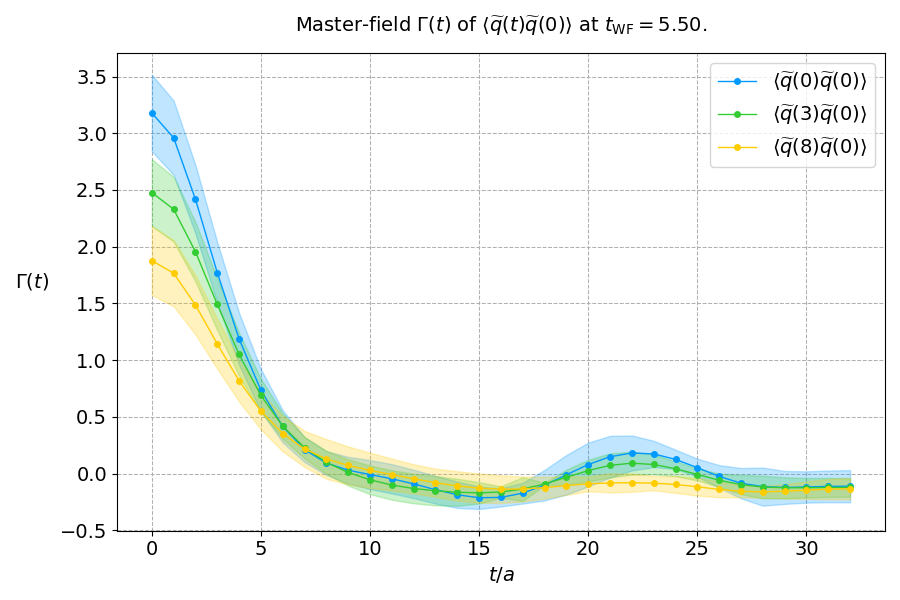

In [14]:
### Choose physical times to plot ###
tphys = [0, 3, 8]

g0, dg0 = Gamma_Q2[tphys[0]].error()
g1, dg1 = Gamma_Q2[tphys[1]].error()
g2, dg2 = Gamma_Q2[tphys[2]].error()

fig, ax = plt.subplots(figsize=(9, 6))

plt.subplots_adjust(top    = 0.95)
plt.subplots_adjust(bottom = 0.05)
plt.subplots_adjust(left   = 0.05)
plt.subplots_adjust(right  = 0.95)
fsize = 14
 

plt.title(rf'Master-field $\Gamma(t)$ of $\langle \widetilde{{q}}(t) \widetilde{{q}}(0) \rangle$ at $t_\mathrm{{WF}} = {t0:.2f}$.', pad=15, fontsize=fsize)

std = 1
const = 1 # np.sqrt(Nbin_Q2)
ax.plot(np.arange(Tmax), g0, label=rf'$\langle \widetilde{{q}}({tphys[0]}) \widetilde{{q}}(0) \rangle$', linestyle='-', marker='o' , markersize=4.0, color='#0099ff', linewidth=1.0)
ax.fill_between(np.arange(Tmax), g0 + std*const*dg0, g0 - std*const*dg0, alpha=.25, color='#0099ff')
ax.plot(np.arange(Tmax), g1, label=rf'$\langle \widetilde{{q}}({tphys[1]}) \widetilde{{q}}(0) \rangle$', linestyle='-', marker='o' , markersize=4.0, color='#33cc33', linewidth=1.0)
ax.fill_between(np.arange(Tmax), g1 + std*const*dg1, g1 - std*const*dg1, alpha=.25, color='#33cc33')
ax.plot(np.arange(Tmax), g2, label=rf'$\langle \widetilde{{q}}({tphys[2]}) \widetilde{{q}}(0) \rangle$', linestyle='-', marker='o' , markersize=4.0, color='#ffcc00', linewidth=1.0)
ax.fill_between(np.arange(Tmax), g2 + std*const*dg2, g2 - std*const*dg2, alpha=.25, color='#ffcc00')
ax.set_xlabel(rf'$t/a$', fontsize=fsize)
ax.set_ylabel(rf'$\Gamma(t)$', rotation=0, labelpad=20, fontsize=fsize)
ax.legend(loc='best', fontsize=fsize)

plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
#plt.xlim([-0.1, T // 2 + 0.5])
#plt.ylim([1e-2, 1e1])
#ax.set_yscale('log', base=10)
#ax.set_xscale('log', base=10)
ax.grid(linestyle = '--', linewidth = 0.75)

fig.tight_layout()

In [26]:
# QQ[i0][tphys[0]].error(plot=True)
# QQ[i0][tphys[1]].error(plot=True)
# QQ[i0][tphys[2]].error(plot=True)

In [19]:
# C = g0[0] + 2 * np.sum(g0[1:12])
# print(np.sqrt(C/(T*Nbin_Q2)))
# C = g1[0] + 2 * np.sum(g1[1:23])
# print(np.sqrt(C/(T*Nbin_Q2)))
# C = g2[0] + 2 * np.sum(g2[1:26])
# print(np.sqrt(C/(T*Nbin_Q2)))

## Bounding Method application

In [21]:
gamma = g0              
# gamma = g2
# gamma = g1

tau0 = 1 / 0.54
W_bnd = bndm.bounding(gamma, tau0, T, Nrep=Nbin_Q2)
    
print(f"\n W_bnd     = {W_bnd}")
W = W_bnd
print(f" err(W={W}) = {np.sqrt(bndm.Cbar_W(gamma, W)/(T * Nbin_Q2))}")


 slowest mode = 1.8518518518518516

 W = 0,  tau_eff^W = 14.48564601566513,  LHS - RHS = 50.50836381745327,  err = 0.05312572455794927
 W = 1,  tau_eff^W = 14.48564601566513,  LHS - RHS = 16.692923573884496,  err = 0.08994720431775254
Both differences at 1 and 2 are positive.
 W = 2,  tau_eff^W = 14.48564601566513,  LHS - RHS = 9.163276693779336,  err = 0.11142834691336152
Both differences at 2 and 3 are positive.
 W = 3,  tau_eff^W = 14.48564601566513,  LHS - RHS = 5.6080375507188105,  err = 0.12491099697222918
Both differences at 3 and 4 are positive.
 W = 4,  tau_eff^W = 14.48564601566513,  LHS - RHS = 3.5674514960979384,  err = 0.1332034629789933
Both differences at 4 and 5 are positive.
 W = 5,  tau_eff^W = 1.809888267258772,  LHS - RHS = 0.580930852181552,  err = 0.1380842345659988
Both differences at 5 and 6 are positive.
 W = 6,  tau_eff^W = 1.7031152836813048,  LHS - RHS = 0.625853790961773,  err = 0.14081643472058375
Both differences at 6 and 7 are positive.

 W_bnd     = 5
